In [192]:
# [문제] 붓꽃 품종 데이터를 이용
# 붓꽃 품종 데이터를 이용해서 품종 분류하기

from sklearn.datasets import load_iris
### 붓꽃 품종 데이터
# - 품종 : setosa, versicolor, virginica
# - sepal length : 꽃받침 길이
# - sepal width : 꽃받침 폭
# - petal length : 꽃잎 길이
# - petal width : 꽃잎 폭

iris = load_iris()
print(iris)
###
print(iris.DESCR)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [193]:
input_ = iris['data']
target_ = iris['target']

In [194]:
# 연관성? 실제로 영향을 주는 값들만 찾기

In [195]:
import pandas as pd

In [196]:
df_input = pd.DataFrame(input_)
df_target = pd.DataFrame(target_)
df = pd.concat([df_input, df_target], axis=1)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [197]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [198]:
# 독립변수 조합
# [sepal_length, petal_length, petal_width]

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

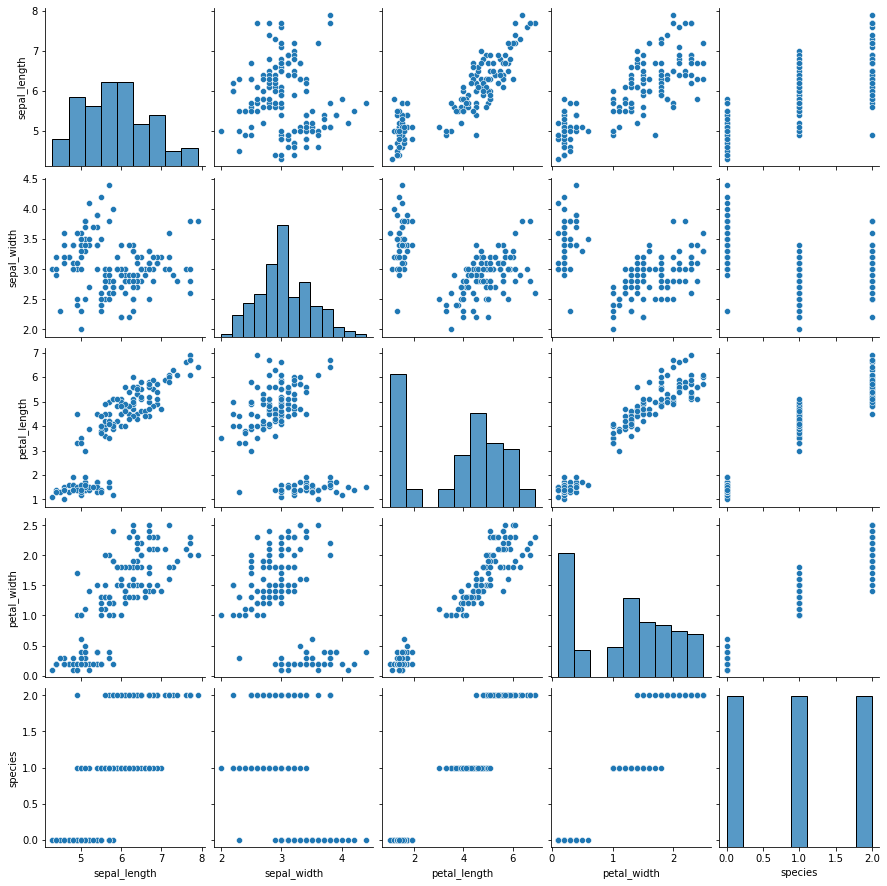

In [200]:
sns.pairplot(df)

In [201]:
# 잘모르겠음....

In [202]:
# 학습데이터, 테스트데이터 나누기
from sklearn.model_selection import train_test_split

In [203]:
train_input, test_input, train_target, test_target = \
train_test_split(input_, target_, random_state=123)

In [204]:
# 독립변수 표준화
from sklearn.preprocessing import StandardScaler

In [205]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [206]:
# knn 분류
from sklearn.neighbors import KNeighborsClassifier

In [207]:
# 0, 1

In [208]:
train_0_1 = train_scaled[(train_target == 0) | (train_target == 1)]

train_target_0_1 = train_target[(train_target == 0) | (train_target == 1)]

test_0_1 = test_scaled[(test_target == 0) | (test_target == 1)]

test_target_0_1 = test_target[(test_target == 0) | (test_target == 1)]

In [209]:
# 기본 모델
kn = KNeighborsClassifier()
kn.fit(train_0_1, train_target_0_1)
print(kn.score(train_0_1, train_target_0_1))
print(kn.score(test_0_1, test_target_0_1))

1.0
1.0


In [210]:
# n_neighbors 값을 바꿔가면서 테스트
for n in range(1,70):
    kn = KNeighborsClassifier(n_neighbors = n)
    kn.fit(train_0_1, train_target_0_1)
    print('n이 {}일때'.format(n))
    print(kn.score(train_0_1, train_target_0_1))
    print(kn.score(test_0_1, test_target_0_1))
    print('\n')

n이 1일때
1.0
1.0


n이 2일때
1.0
1.0


n이 3일때
1.0
1.0


n이 4일때
1.0
1.0


n이 5일때
1.0
1.0


n이 6일때
1.0
1.0


n이 7일때
1.0
1.0


n이 8일때
1.0
1.0


n이 9일때
1.0
1.0


n이 10일때
1.0
1.0


n이 11일때
1.0
1.0


n이 12일때
1.0
1.0


n이 13일때
1.0
1.0


n이 14일때
1.0
1.0


n이 15일때
1.0
1.0


n이 16일때
1.0
1.0


n이 17일때
1.0
1.0


n이 18일때
1.0
1.0


n이 19일때
1.0
1.0


n이 20일때
1.0
1.0


n이 21일때
1.0
1.0


n이 22일때
1.0
1.0


n이 23일때
1.0
1.0


n이 24일때
1.0
1.0


n이 25일때
1.0
1.0


n이 26일때
1.0
1.0


n이 27일때
1.0
1.0


n이 28일때
1.0
1.0


n이 29일때
1.0
1.0


n이 30일때
1.0
1.0


n이 31일때
1.0
1.0


n이 32일때
1.0
1.0


n이 33일때
1.0
1.0


n이 34일때
1.0
1.0


n이 35일때
1.0
1.0


n이 36일때
1.0
1.0


n이 37일때
1.0
1.0


n이 38일때
1.0
1.0


n이 39일때
1.0
1.0


n이 40일때
1.0
1.0


n이 41일때
1.0
1.0


n이 42일때
1.0
1.0


n이 43일때
1.0
1.0


n이 44일때
1.0
1.0


n이 45일때
1.0
1.0


n이 46일때
1.0
1.0


n이 47일때
1.0
1.0


n이 48일때
1.0
1.0


n이 49일때
0.9868421052631579
1.0


n이 50일때
0.9868421052631579
1.0


n이 51일때
0.9868421052631579
1.0


n이 52일때
1.0
1.0


n이 53일때
1.0
1.0


n이 54일때
1.

In [211]:
kn.predict_proba(test_0_1)

array([[0.39130435, 0.60869565],
       [0.39130435, 0.60869565],
       [0.49275362, 0.50724638],
       [0.39130435, 0.60869565],
       [0.49275362, 0.50724638],
       [0.47826087, 0.52173913],
       [0.39130435, 0.60869565],
       [0.47826087, 0.52173913],
       [0.39130435, 0.60869565],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.39130435, 0.60869565],
       [0.47826087, 0.52173913],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.39130435, 0.60869565],
       [0.39130435, 0.60869565],
       [0.47826087, 0.52173913]])

In [212]:
# k-최근접이웃 모델을 사용했을때,
# 독립변수는 sepal_length sepal_width petal_length petal_width를 사용
# n_neighbors의 값을 바꿔가면서 
# 학습데이터와 테스트데이터의 정확도를 비교했을 때,
# n이 49일때 최초로 과소적합이 발생합니다
# 0(setosa)과 1(versicolor)의 품종 간의 특성이 확실하기 때문에
# 정확도가 높게 나오는 것으로 추측됩니다.

In [213]:
# 1, 2

In [214]:
train_1_2 = train_scaled[(train_target == 2) | (train_target == 1)]

train_target_1_2 = train_target[(train_target == 2) | (train_target == 1)]

test_1_2 = test_scaled[(test_target == 2) | (test_target == 1)]

test_target_1_2 = test_target[(test_target == 2) | (test_target == 1)]

In [215]:
# 기본 모델
kn = KNeighborsClassifier()
kn.fit(train_1_2, train_target_1_2)
print(kn.score(train_1_2, train_target_1_2))
print(kn.score(test_1_2, test_target_1_2))

0.9743589743589743
0.8636363636363636


In [216]:
# n_neighbors 값을 바꿔가면서 테스트
for n in range(1,70):
    kn = KNeighborsClassifier(n_neighbors = n)
    kn.fit(train_1_2, train_target_1_2)
    print('n이 {}일때'.format(n))
    print(kn.score(train_1_2, train_target_1_2))
    print(kn.score(test_1_2, test_target_1_2))
    print('\n')

n이 1일때
1.0
0.8636363636363636


n이 2일때
0.9615384615384616
0.8181818181818182


n이 3일때
0.9487179487179487
0.8181818181818182


n이 4일때
0.9487179487179487
0.8181818181818182


n이 5일때
0.9743589743589743
0.8636363636363636


n이 6일때
0.9615384615384616
0.7727272727272727


n이 7일때
0.9615384615384616
0.8181818181818182


n이 8일때
0.9615384615384616
0.8181818181818182


n이 9일때
0.9615384615384616
0.8181818181818182


n이 10일때
0.9487179487179487
0.8181818181818182


n이 11일때
0.9743589743589743
0.8181818181818182


n이 12일때
0.9615384615384616
0.8636363636363636


n이 13일때
0.9743589743589743
0.8636363636363636


n이 14일때
0.9615384615384616
0.7727272727272727


n이 15일때
0.9743589743589743
0.8181818181818182


n이 16일때
0.9615384615384616
0.7272727272727273


n이 17일때
0.9615384615384616
0.7727272727272727


n이 18일때
0.9615384615384616
0.7727272727272727


n이 19일때
0.9615384615384616
0.7727272727272727


n이 20일때
0.9487179487179487
0.7727272727272727


n이 21일때
0.9743589743589743
0.7727272727272727


n이 22일때
0.961538

In [217]:
kn.predict_proba(test_1_2)

array([[0.5942029 , 0.4057971 ],
       [0.49275362, 0.50724638],
       [0.50724638, 0.49275362],
       [0.5942029 , 0.4057971 ],
       [0.53623188, 0.46376812],
       [0.60869565, 0.39130435],
       [0.60869565, 0.39130435],
       [0.49275362, 0.50724638],
       [0.60869565, 0.39130435],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.56521739, 0.43478261],
       [0.56521739, 0.43478261],
       [0.53623188, 0.46376812],
       [0.57971014, 0.42028986],
       [0.49275362, 0.50724638],
       [0.49275362, 0.50724638],
       [0.60869565, 0.39130435],
       [0.60869565, 0.39130435],
       [0.60869565, 0.39130435],
       [0.49275362, 0.50724638]])

In [218]:
# k-최근접이웃 모델을 사용했을때,
# 독립변수는 sepal_length sepal_width petal_length petal_width를 사용
# n_neighbors의 값을 바꿔가면서 
# 학습데이터와 테스트데이터의 정확도를 비교했을 때,
# 모든 값에서 과대적합이 발생
# 특성항목을 늘려서 분석 진행

In [219]:
# 특성 조합
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(train_1_2)
train_1_2_poly = poly.transform(train_1_2)
test_1_2_poly = poly.transform(test_1_2)

In [220]:
# 기본 모델
kn = KNeighborsClassifier()
kn.fit(train_1_2_poly, train_target_1_2)
print(kn.score(train_1_2_poly, train_target_1_2))
print(kn.score(test_1_2_poly, test_target_1_2))

0.9487179487179487
0.7727272727272727


In [221]:
# n_neighbors 값을 바꿔가면서 테스트
for n in range(1,70):
    kn = KNeighborsClassifier(n_neighbors = n)
    kn.fit(train_1_2_poly, train_target_1_2)
    print('n이 {}일때'.format(n))
    print(kn.score(train_1_2_poly, train_target_1_2))
    print(kn.score(test_1_2_poly, test_target_1_2))
    print('\n')

n이 1일때
1.0
0.8636363636363636


n이 2일때
0.9615384615384616
0.7727272727272727


n이 3일때
0.9615384615384616
0.8181818181818182


n이 4일때
0.9358974358974359
0.7727272727272727


n이 5일때
0.9487179487179487
0.7727272727272727


n이 6일때
0.9487179487179487
0.7727272727272727


n이 7일때
0.9615384615384616
0.7727272727272727


n이 8일때
0.9615384615384616
0.7272727272727273


n이 9일때
0.9615384615384616
0.7727272727272727


n이 10일때
0.9358974358974359
0.7272727272727273


n이 11일때
0.9615384615384616
0.7727272727272727


n이 12일때
0.9487179487179487
0.7272727272727273


n이 13일때
0.9615384615384616
0.7272727272727273


n이 14일때
0.9487179487179487
0.7727272727272727


n이 15일때
0.9487179487179487
0.7727272727272727


n이 16일때
0.9358974358974359
0.7727272727272727


n이 17일때
0.9358974358974359
0.7727272727272727


n이 18일때
0.9358974358974359
0.7272727272727273


n이 19일때
0.9358974358974359
0.7272727272727273


n이 20일때
0.9358974358974359
0.7272727272727273


n이 21일때
0.9358974358974359
0.7272727272727273


n이 22일때
0.897435

In [222]:
# n이 50일때 
# 학습데이터와 테스트데이터의 정확도 차이가 가장 줄어들지만
# 정확도가 낮아지고 여전히 과대적합
# 로지스틱 이진분류모델을 통한 분석이 필요

In [223]:
# 이진분류
from sklearn.linear_model import LogisticRegression

In [224]:
# 기본모델
lr = LogisticRegression()
lr.fit(train_1_2_poly, train_target_1_2)
print(lr.score(train_1_2_poly, train_target_1_2))
print(lr.score(test_1_2_poly, test_target_1_2))

1.0
0.8636363636363636


In [225]:
# 로지스틱 이진분류 모델을 사용했지만 여전히 과대적합
# 규제강도를 다르게해서 다시 분석 진행

In [226]:
# 규제강도 변경
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_1_2_poly, train_target_1_2)
print(lr.score(train_1_2_poly, train_target_1_2))
print(lr.score(test_1_2_poly, test_target_1_2))

0.9871794871794872
0.9090909090909091


In [227]:
# 규제강도 C를 바꾸면서 정확도 확인
for C in range(20,0,-1):
    lr = LogisticRegression(C = C, max_iter = 1000)
    lr.fit(train_1_2_poly, train_target_1_2)
    print('C의 값은 {}'.format(C))
    print(lr.score(train_1_2_poly, train_target_1_2))
    print(lr.score(test_1_2_poly, test_target_1_2))
    print('\n')

C의 값은 20
0.9871794871794872
0.9090909090909091


C의 값은 19
0.9871794871794872
0.9090909090909091


C의 값은 18
0.9871794871794872
0.9090909090909091


C의 값은 17
0.9871794871794872
0.9090909090909091


C의 값은 16
0.9871794871794872
0.9090909090909091


C의 값은 15
0.9871794871794872
0.9090909090909091


C의 값은 14
0.9871794871794872
0.9090909090909091


C의 값은 13
0.9871794871794872
0.9090909090909091


C의 값은 12
0.9871794871794872
0.9090909090909091


C의 값은 11
0.9871794871794872
0.9090909090909091


C의 값은 10
0.9871794871794872
0.9090909090909091


C의 값은 9
0.9871794871794872
0.9090909090909091


C의 값은 8
0.9871794871794872
0.9090909090909091


C의 값은 7
0.9871794871794872
0.9090909090909091


C의 값은 6
0.9871794871794872
0.9090909090909091


C의 값은 5
0.9871794871794872
0.9090909090909091


C의 값은 4
0.9871794871794872
0.9090909090909091


C의 값은 3
0.9871794871794872
0.9090909090909091


C의 값은 2
0.9871794871794872
0.8636363636363636


C의 값은 1
1.0
0.8636363636363636




In [228]:
# 여전히 과대적합 발생.....

In [229]:
# 다중분류

In [230]:
# 기본모델
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9910714285714286
0.9736842105263158


In [231]:
# 규제강도 C를 바꾸면서 정확도 확인
for n in range(20,0,-1):
    lr = LogisticRegression(C = n, max_iter = 1000)
    lr.fit(train_scaled, train_target)
    print('C의 값은 {}'.format(n))
    print(lr.score(train_scaled, train_target))
    print(lr.score(test_scaled, test_target))
    print('\n')

C의 값은 20
0.9910714285714286
0.9736842105263158


C의 값은 19
0.9910714285714286
0.9736842105263158


C의 값은 18
0.9910714285714286
0.9736842105263158


C의 값은 17
0.9910714285714286
0.9736842105263158


C의 값은 16
0.9910714285714286
0.9736842105263158


C의 값은 15
0.9910714285714286
0.9736842105263158


C의 값은 14
0.9910714285714286
0.9736842105263158


C의 값은 13
0.9910714285714286
0.9736842105263158


C의 값은 12
0.9910714285714286
0.9736842105263158


C의 값은 11
0.9910714285714286
0.9736842105263158


C의 값은 10
0.9910714285714286
0.9736842105263158


C의 값은 9
0.9910714285714286
0.9736842105263158


C의 값은 8
0.9910714285714286
0.9736842105263158


C의 값은 7
0.9910714285714286
0.9736842105263158


C의 값은 6
0.9910714285714286
0.9736842105263158


C의 값은 5
0.9910714285714286
0.9736842105263158


C의 값은 4
0.9910714285714286
0.9736842105263158


C의 값은 3
0.9910714285714286
0.9736842105263158


C의 값은 2
0.9910714285714286
0.9736842105263158


C의 값은 1
0.9821428571428571
0.9736842105263158




In [232]:
# 학습데이터의 정확도가 0.9910714285714286
# 테스트데이터의 정확도가 0.9736842105263158
# 매우 우수한 모델입니다
# C의 값이 20일때, 학습데이터의 정확도가 더 큰 과대적합
# 학습데이터와 테스트데이터의 정확도간 차이를 줄이기 위해서
# C의 값을 줄이면서 규제강도를 늘려서 반복 실행
# 큰 의미는 없었습니다
# 특성항목을 늘려서 다시 분석 진행

In [233]:
# 특성 조합
poly = PolynomialFeatures()
poly.fit(train_scaled)
train_poly = poly.transform(train_scaled)
test_poly = poly.transform(test_scaled)

In [234]:
# 기본모델
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9910714285714286
0.9473684210526315


In [235]:
# 규제강도 C를 바꾸면서 정확도 확인
for n in range(20,0,-1):
    lr = LogisticRegression(C = n, max_iter = 1000)
    lr.fit(train_poly, train_target)
    print('C의 값은 {}'.format(n))
    print(lr.score(train_poly, train_target))
    print(lr.score(test_poly, test_target))
    print('\n')

C의 값은 20
0.9910714285714286
0.9473684210526315


C의 값은 19
0.9910714285714286
0.9473684210526315


C의 값은 18
0.9910714285714286
0.9473684210526315


C의 값은 17
0.9910714285714286
0.9473684210526315


C의 값은 16
0.9910714285714286
0.9473684210526315


C의 값은 15
0.9910714285714286
0.9473684210526315


C의 값은 14
0.9910714285714286
0.9473684210526315


C의 값은 13
0.9910714285714286
0.9473684210526315


C의 값은 12
0.9910714285714286
0.9473684210526315


C의 값은 11
0.9910714285714286
0.9473684210526315


C의 값은 10
0.9910714285714286
0.9473684210526315


C의 값은 9
0.9910714285714286
0.9473684210526315


C의 값은 8
0.9910714285714286
0.9473684210526315


C의 값은 7
0.9910714285714286
0.9473684210526315


C의 값은 6
0.9910714285714286
0.9473684210526315


C의 값은 5
0.9910714285714286
0.9473684210526315


C의 값은 4
0.9910714285714286
0.9473684210526315


C의 값은 3
0.9910714285714286
0.9473684210526315


C의 값은 2
0.9910714285714286
0.9473684210526315


C의 값은 1
0.9910714285714286
0.9210526315789473




In [236]:
# 특성항목을 늘려서 다시 분석했을 때,
# 테스트데이터의 정확도가 낮아짐
# 오히려 특성항목을 늘리기 전보다
# 학습데이터와 테스트데이터의 정확도간 차이가 늘어남
# 규제강도를 바꾼 것은 큰 의미가 없었음.....
# 처음에 사용했던 로지스틱 다중분류 모델 선택

In [237]:
# 독립변수의 갯수를 바꿔보면서 모델 생성하기

In [238]:
# 상관계수가 매우 강하게 나타나는 독립변수들만 이용해서 분석
# [sepal_length, petal_length, petal_width]

In [239]:
# 사용할 변수만 가져와서 넘파이 배열형태로 변환
input_ = df[['sepal_length', 'petal_length', 'petal_width']]
target_ = df['species']
input_ = input_.to_numpy()
target_ = target_.to_numpy()

In [240]:
# 학습, 테스트 데이터 나누기
train_input, test_input, train_target, test_target = \
train_test_split(input_, target_, random_state=123)

In [241]:
# 표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [242]:
# 기본모델
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


In [243]:
# 규제강도 C를 바꾸면서 정확도 확인
for n in range(20,0,-1):
    lr = LogisticRegression(C = n, max_iter = 1000)
    lr.fit(train_scaled, train_target)
    print('C의 값은 {}'.format(n))
    print(lr.score(train_scaled, train_target))
    print(lr.score(test_scaled, test_target))
    print('\n')

C의 값은 20
0.9821428571428571
0.9473684210526315


C의 값은 19
0.9821428571428571
0.9473684210526315


C의 값은 18
0.9821428571428571
0.9473684210526315


C의 값은 17
0.9821428571428571
0.9473684210526315


C의 값은 16
0.9821428571428571
0.9473684210526315


C의 값은 15
0.9821428571428571
0.9473684210526315


C의 값은 14
0.9821428571428571
0.9473684210526315


C의 값은 13
0.9821428571428571
0.9473684210526315


C의 값은 12
0.9821428571428571
0.9473684210526315


C의 값은 11
0.9821428571428571
0.9473684210526315


C의 값은 10
0.9821428571428571
0.9473684210526315


C의 값은 9
0.9821428571428571
0.9473684210526315


C의 값은 8
0.9821428571428571
0.9473684210526315


C의 값은 7
0.9821428571428571
0.9473684210526315


C의 값은 6
0.9821428571428571
0.9473684210526315


C의 값은 5
0.9821428571428571
0.9473684210526315


C의 값은 4
0.9821428571428571
0.9473684210526315


C의 값은 3
0.9642857142857143
0.9473684210526315


C의 값은 2
0.9732142857142857
0.9473684210526315


C의 값은 1
0.9642857142857143
0.9473684210526315




In [244]:
# 독립변수를 4개 사용했을 때와 비교했을 때,
# 학습데이터의 정확도는 조금 낮아지고
# 테스트데이터의 정확도는 차이가 전혀 없음
# 특성항목을 늘려서 다시 분석 진행

In [245]:
# 특성 조합
poly = PolynomialFeatures()
poly.fit(train_scaled)
train_poly = poly.transform(train_scaled)
test_poly = poly.transform(test_scaled)

In [246]:
# 기본모델
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9821428571428571
0.9473684210526315


In [247]:
# 규제강도 C를 바꾸면서 정확도 확인
for n in range(20,0,-1):
    lr = LogisticRegression(C = n, max_iter = 1000)
    lr.fit(train_scaled, train_target)
    print('C의 값은 {}'.format(n))
    print(lr.score(train_scaled, train_target))
    print(lr.score(test_scaled, test_target))
    print('\n')

C의 값은 20
0.9821428571428571
0.9473684210526315


C의 값은 19
0.9821428571428571
0.9473684210526315


C의 값은 18
0.9821428571428571
0.9473684210526315


C의 값은 17
0.9821428571428571
0.9473684210526315


C의 값은 16
0.9821428571428571
0.9473684210526315


C의 값은 15
0.9821428571428571
0.9473684210526315


C의 값은 14
0.9821428571428571
0.9473684210526315


C의 값은 13
0.9821428571428571
0.9473684210526315


C의 값은 12
0.9821428571428571
0.9473684210526315


C의 값은 11
0.9821428571428571
0.9473684210526315


C의 값은 10
0.9821428571428571
0.9473684210526315


C의 값은 9
0.9821428571428571
0.9473684210526315


C의 값은 8
0.9821428571428571
0.9473684210526315


C의 값은 7
0.9821428571428571
0.9473684210526315


C의 값은 6
0.9821428571428571
0.9473684210526315


C의 값은 5
0.9821428571428571
0.9473684210526315


C의 값은 4
0.9821428571428571
0.9473684210526315


C의 값은 3
0.9642857142857143
0.9473684210526315


C의 값은 2
0.9732142857142857
0.9473684210526315


C의 값은 1
0.9642857142857143
0.9473684210526315




In [248]:
# 특성항목을 늘려서 다시 분석했을 때,
# 특성항목을 늘리기 이전과 차이가 전혀 없음....
# 규제강도를 바꾼 것은 큰 의미가 없음.....